In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

len(os.listdir("/content/drive/MyDrive/ppppppp/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen= ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/ppppppp/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)


val=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/ppppppp/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)

Found 6672 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img,label=train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImgage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

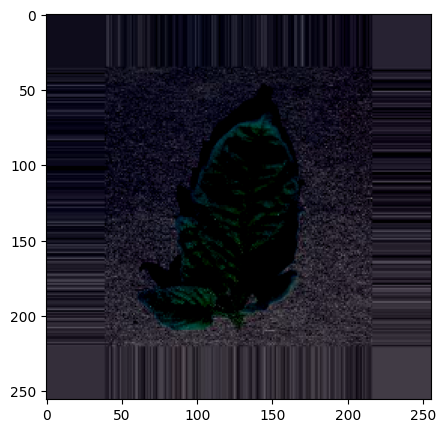

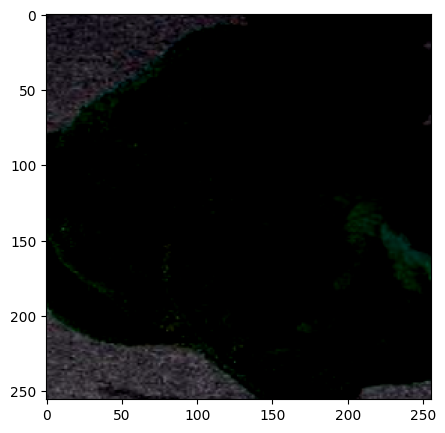

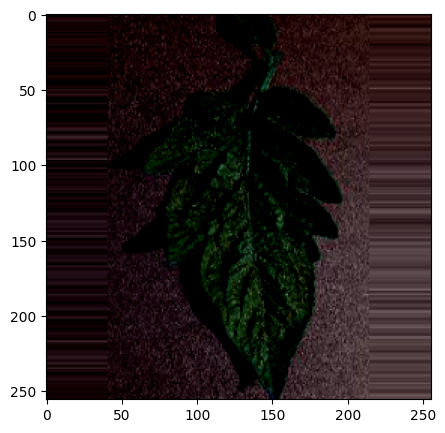

In [ ]:
plotImgage(t_img[:3],label[:3])

Building The Model


In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

#Creating our model
model=Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#Early Stopping and Model Check point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
#model checkpoint
mc=ModelCheckpoint(filepath="best_model.h5",
                   monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,
                   save_best_only=True)

cb=[es,mc]

In [ ]:
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

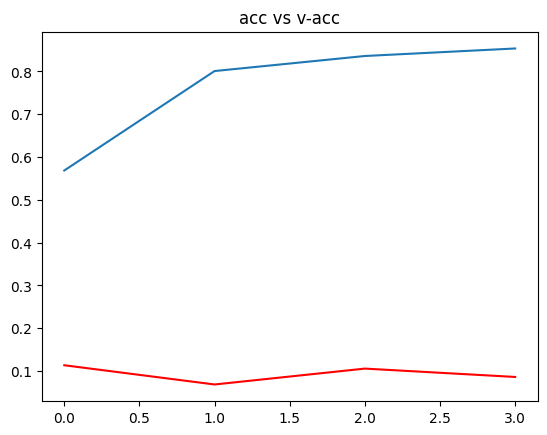

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

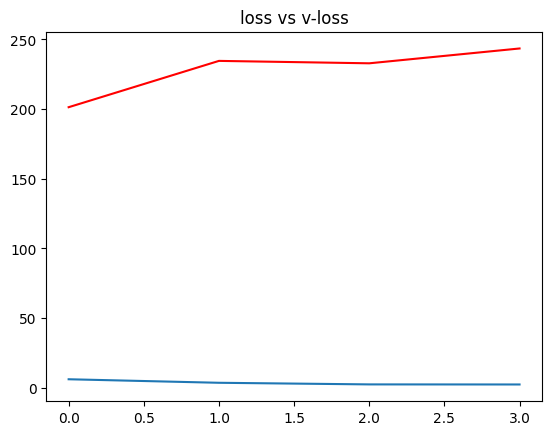

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v-loss')
plt.show()

In [ ]:
#Load best model
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]
print(f"The accurace of your model is={acc*100}%")

In [ ]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  iml=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(iml))
  print(f"the image belongs to{ref[pred]}")


In [ ]:
path="/content/drive/MyDrive/ppppppp/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy/01b32971-5125-4982-98e2-22daa9ae864a___RS_HL 7977.JPG"
prediction(path)

1/1 [==============================] - 1s 1s/step
the image belongs toTomato___Target_Spot
